In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_random_symmetric_matrix(dim):
    M_random = torch.rand((dim,dim)) - 0.5
    return 0.5 * (M_random.T + M_random)

def eigenvalue_of_eigenvector(x, A):
    return (x @ A @ x.T) / (x @ x.T)

In [6]:
def rk4(f, x0, t_interval, dt=None):
    t0 = t_interval[0]
    t1 = t_interval[1]
    dt = (t1 - t0)/1000 if dt is None else dt
    
    t = [t0]
    x = [x0]
    while t[-1] < t1:
        
        k1 = f(t[-1], x[-1])
        k2 = f(t[-1] + dt/2, x[-1] + dt*k1/2)
        k3 = f(t[-1] + dt/2, x[-1] + dt*k2/2)
        k4 = f(t[-1] + dt, x[-1] + dt*k3)
        
        x.append(x[-1] + 1/6 * dt * (k1 + 2*k2* + 2*k3 + k4))
        t.append(t[-1] + dt)
        
    return t, x

In [31]:
def f(t, x, A):
    return (x @ x.T) @ x @ A  - (x @ A @ x.T) @ x

random_matrix = False
dim = 6
if random_matrix:
    A = generate_random_symmetric_matrix(dim).float()
else:
    B = np.arange(36).reshape(dim,dim)
    A = 1.0/np.linalg.norm(B) * (np.tril(B) + np.tril(B).T)

assert np.allclose(A, A.T, rtol=1e-8, atol=1e-10)
print(f"A = {A}")

fA = lambda t, x: f(t, x, A)
x0 = np.random.rand(dim).reshape(1,-1)
x0 /= np.sqrt(x0 @ x0.T)

A = [[0.         0.04913743 0.09827486 0.14741229 0.19654972 0.24568714]
 [0.04913743 0.114654   0.10646443 0.15560186 0.20473929 0.25387672]
 [0.09827486 0.10646443 0.229308   0.16379143 0.21292886 0.26206629]
 [0.14741229 0.15560186 0.16379143 0.343962   0.22111843 0.27025586]
 [0.19654972 0.20473929 0.21292886 0.22111843 0.458616   0.27844543]
 [0.24568714 0.25387672 0.26206629 0.27025586 0.27844543 0.57327   ]]


In [44]:
t, x = rk4(fA, x0, [0,20])
x = np.array(x).squeeze().T
print(x.shape)

(6, 1002)


In [45]:
#Ground Truth
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Sort in descending order
permutation = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[permutation]
eigenvectors = eigenvectors[permutation]
print(f"Sp(A) = {eigenvalues}")
print(f"max{{ Sp(A) }} = {np.max(eigenvalues)}")

Sp(A) = [ 1.35883616  0.23169214  0.15845079  0.08911655  0.02113963 -0.13942525]
max{ Sp(A) } = 1.358836157510195


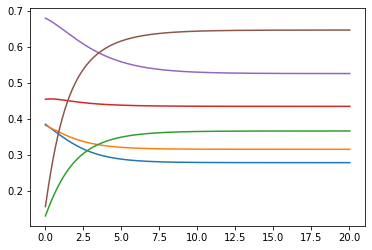

1.3588361542079588


In [48]:
#ODE Result
for element in x:
    plt.plot(t,element)
plt.show()
print(eigenvalue_of_eigenvector(x[:,-1],A))